In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_ = datasets.load_iris()

In [4]:
iris = iris_.copy()

In [5]:
iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])

In [6]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
iris.describe(include = 'all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

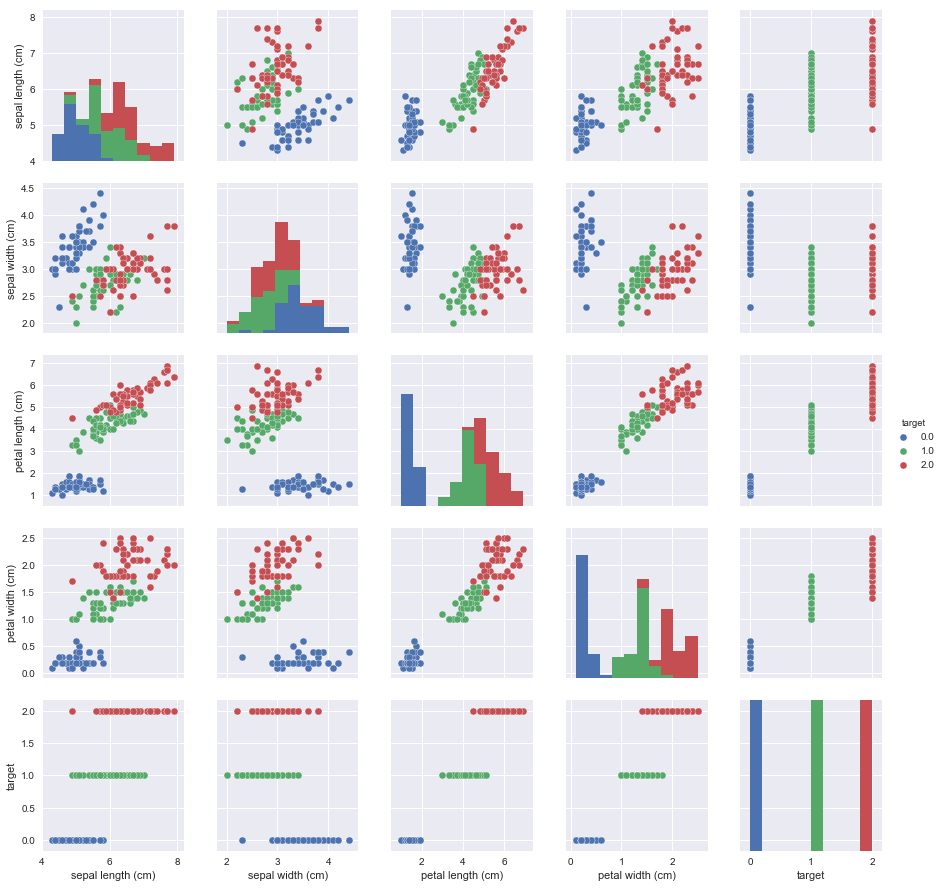

In [9]:
sns.set(context = 'notebook'
        , style = 'darkgrid'
        , palette = 'deep'
        , font = 'sans-serif'
        , font_scale = 1
        , color_codes = True
        , rc = None)

# Scatter plots for the features
sns.pairplot(iris, hue = 'target')

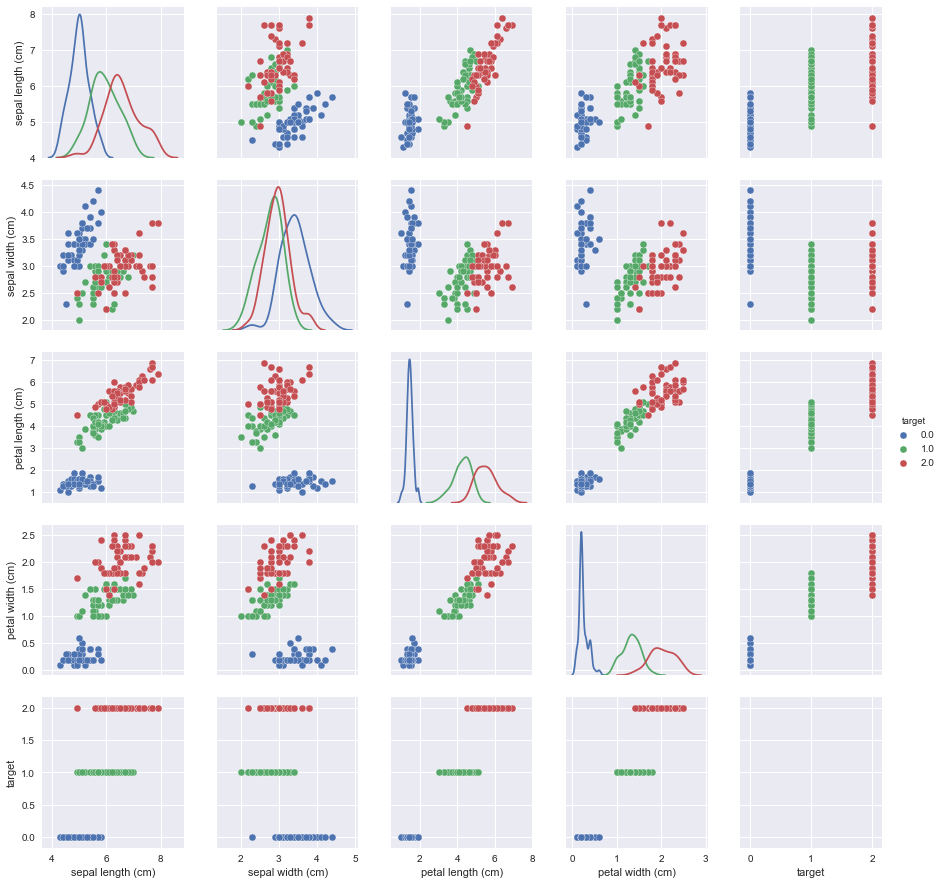

In [10]:
# Scatter plots for the features
sns.pairplot(iris, hue = 'target', diag_kind = 'kde')

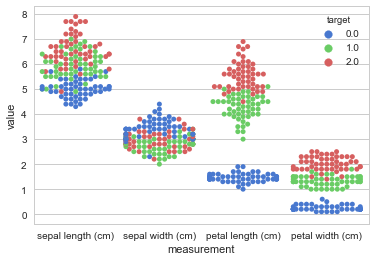

In [11]:
sns.set(style = 'whitegrid', palette = 'muted')

# "Melt" the dataset
iris2 = pd.melt(iris, 'target', var_name = 'measurement')

# Draw a categorical scatterplot
sns.swarmplot(x = 'measurement'
              , y = 'value'
              , hue = 'target'
              , data = iris2)

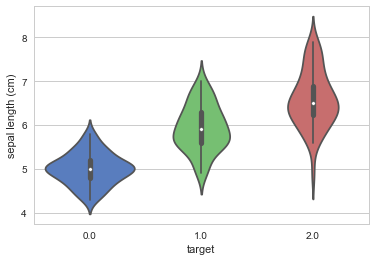

In [12]:
# Violin Plot for Petal Length (most distinguishing feature)
sns.violinplot(x = 'target'
               , y = 'sepal length (cm)'
               , data = iris)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


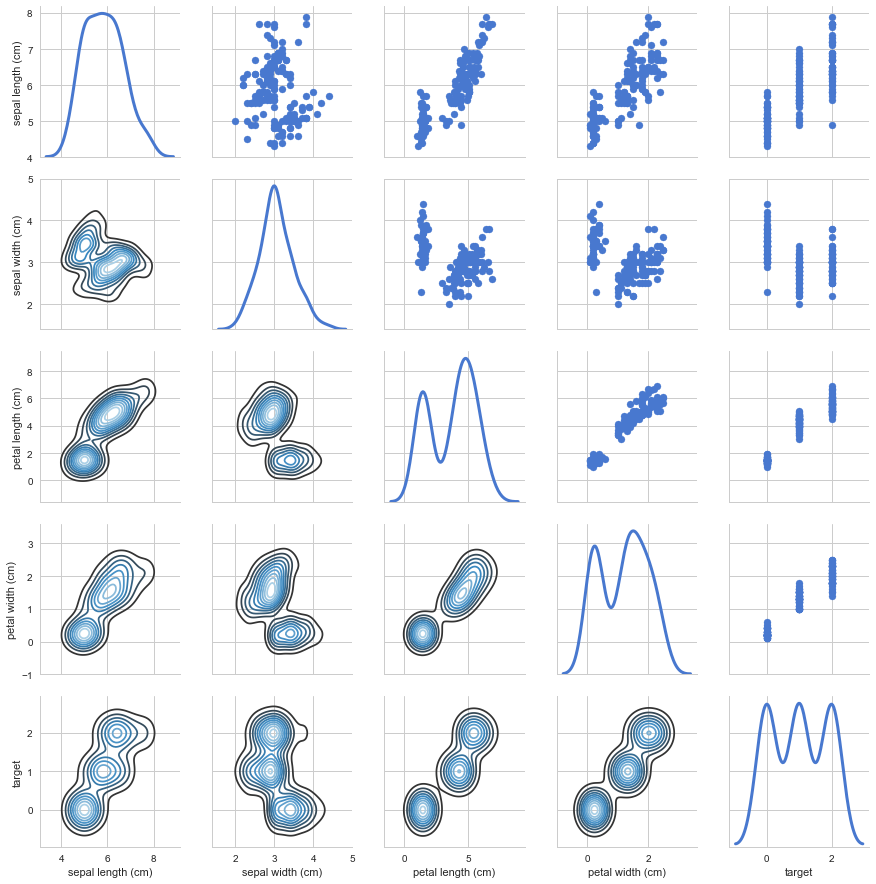

In [13]:
# Paired Density and Scatterplot Matrix
g = sns.PairGrid(iris, diag_sharey = False)
g.map_lower(sns.kdeplot, cmap = "Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 3)

In [14]:
corr = iris.corr()

In [15]:
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


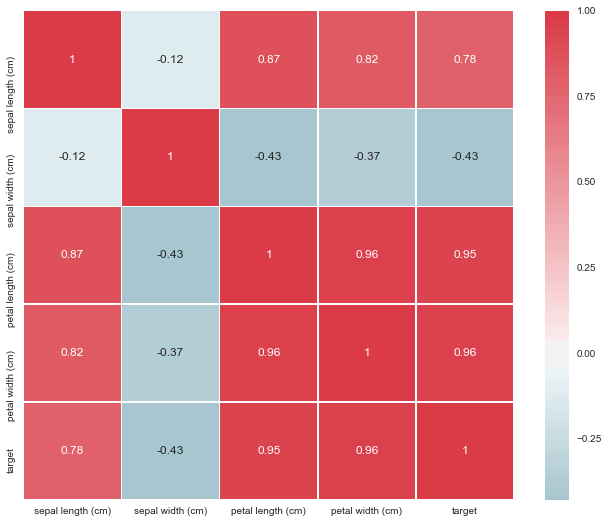

In [16]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  
            center=0,
            linewidths=.5,
            cmap=colormap,
            annot=True)